# Penguin Species Segmentation

## About Dataset

Penguin Data is a comprehensive dataset that provides a detailed analysis of different species of penguins. By collecting and summarizing the different attributes about penguins we can understand the difference among different species of it.

The dataset includes 344 records and 5 columns, providing a wealth of information about the penguins. Each column represents a specific aspect of the penguin's species, including their culmen length & depth, flipper length, body mass and sex.

By analyzing this data, we can gain valuable insights into the penguin's culmen, flipper and body mass differences between male and female of different species.

## Data Dictionary

**culmen_length_mm**

* Numerical
* It is culmen length of a penguin in mm.

**culmen_depth_mm**

* Numerical
* It is culmen depth of a penguin in mm.

**flipper_length_mm**

* Numerical
* It is flipper length of a penguin in mm.

**body_mass_g**

* Numerical
* It is body mass of a penguin in grams.

**sex**

* Categorical
* It is sex of a penguin. It contains **Male** and **Female**.



## Problem Statement

* Conduct an in-depth Exploratory Data Analysis on a dataset, uncovering insights, patterns, and relationships within the data.
* Create a profile for different groups(or clusters) for different species of penguin.

## Load Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")

## Load Dataset and Get what it contains

In [ ]:
import os
folder_path = "drive/MyDrive/Colab Notebooks/dscourse/data"
file_path = os.path.join(folder_path, "penguins.csv")

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
# Print the shape
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

Number of Rows: 344
Number of Columns: 5


In [ ]:
# 1st 5 rows
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


#### Checking Data Types

By checking datatype of each column we can identify the categorical and numerical columns present in the dataset.

In [ ]:
cat_columns = []
num_columns = []

for col in df.columns:
  if df[col].dtype == "object":
    cat_columns.append(col)
  else:
    num_columns.append(col)

print(f"Number of categorical columns: {len(cat_columns)}")
print(f"Categorical columns: {cat_columns}")
print("-"* 60)
print(f"Number of numerical columns: {len(num_columns)}")
print(f"Numerical columns: {num_columns}")
print("-"* 60)


Number of categorical columns: 1
Categorical columns: ['sex']
------------------------------------------------------------
Number of numerical columns: 4
Numerical columns: ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
------------------------------------------------------------


#### Missing Value Detection

Missing value detection is essential to chack the quality of the data. If present impute it with proper value so that quality of the data is maintained for robust statistical analysis.

In [ ]:
def missing_values(df):
  missing_cols = []
  for col in df.columns:
    if df[col].isnull().sum() > 0:
      print(f"Number of missing values in {col}: {df[col].isnull().sum()}")
      missing_cols.append(col)
  return missing_cols

In [ ]:
missing_cols = missing_values(df)
if len(missing_cols) == 0:
  print(f"No missing value present in dataset.")

Number of missing values in culmen_length_mm: 2
Number of missing values in culmen_depth_mm: 2
Number of missing values in flipper_length_mm: 2
Number of missing values in body_mass_g: 2
Number of missing values in sex: 9


#### Check the distribution of numerical columns to decide whether to use mean imputation or median imputation.

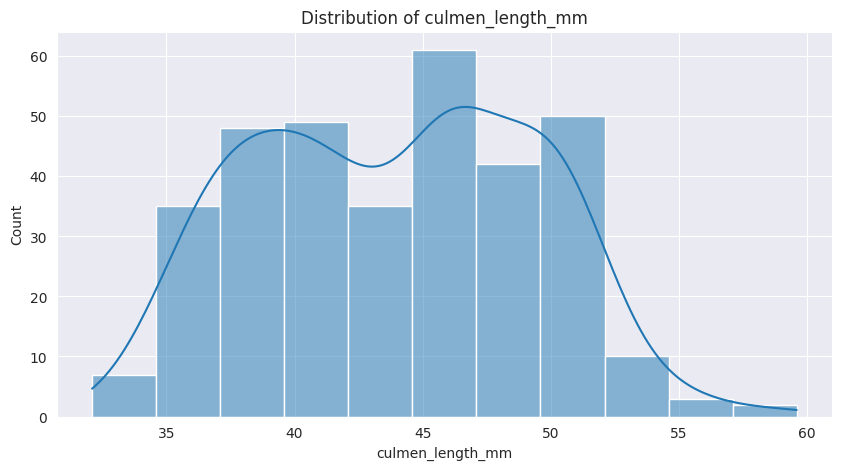

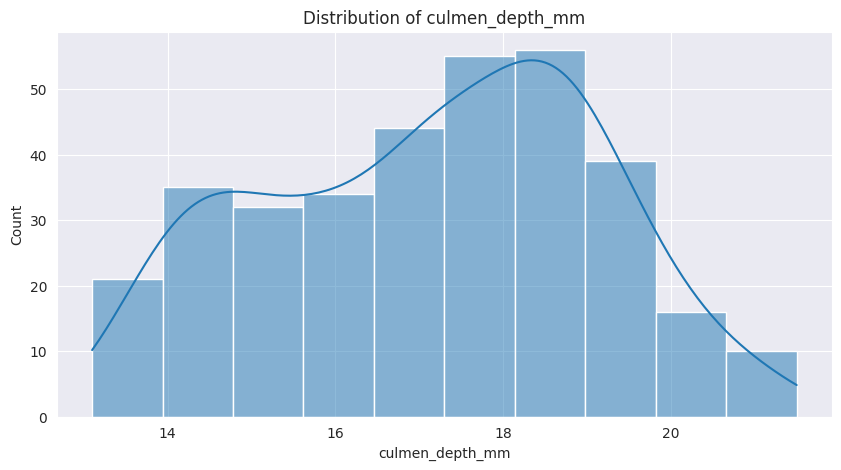

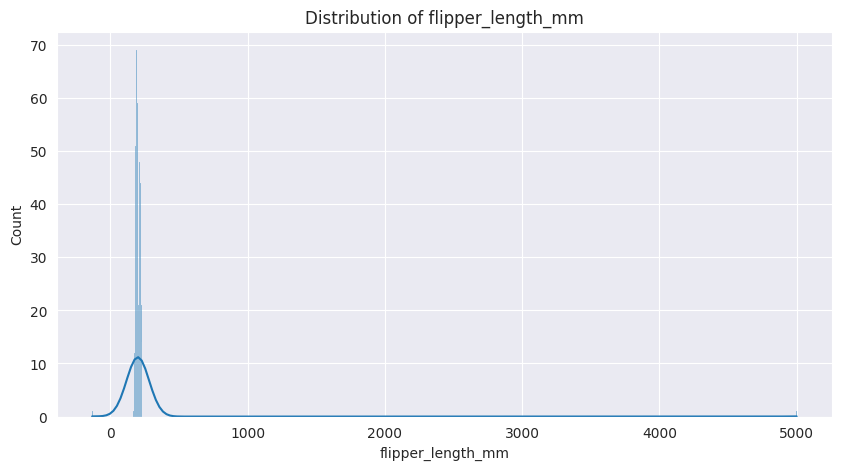

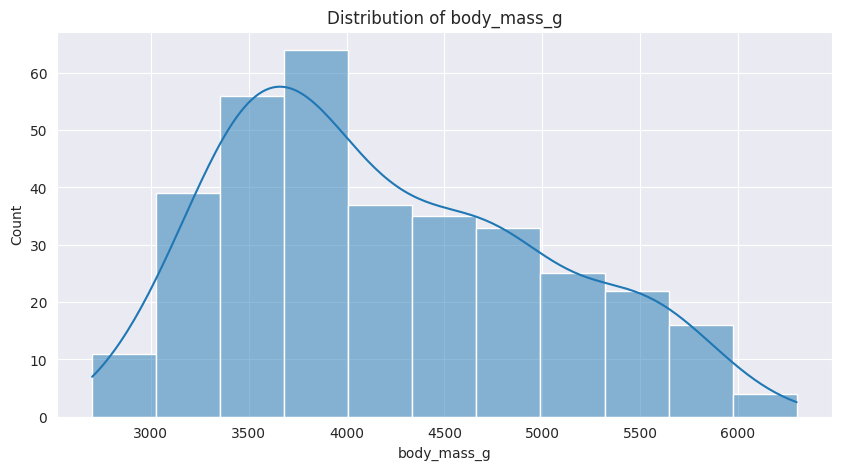

In [ ]:
for col in num_columns:
  plt.figure(figsize=(10, 5))
  sns.histplot(data=df, x= col, kde=True)
  plt.title(f"Distribution of {col}")

### Observations

* From the distributions of numerical columns we found that none of them is normally distributed, so, we should use **Median** imputation.
* For missing categorical features we use **Mode** imputation.

In [ ]:
for col in missing_cols:
  if df[col].dtype == "object":
    # Impute mode for categorical feature
    mode = df[col].mode()[0]
    df[col].fillna(mode, inplace=True)
  else:
    # Impute median for numerical features
    median = df[col].median()
    df[col].fillna(median, inplace=True)


In [ ]:
# Sanity Check
missing_cols = missing_values(df)
if len(missing_cols) == 0:
  print(f"No more missing values present in dataset")

No more missing values present in dataset


### Duplicate Row Detection

Detecting duplicate rows and removing them is vital for ensuring quality of data, integrity, accuracy and performance.

In [ ]:
print(f"Number of duplicate rows: {df[df.duplicated()].shape[0]}")

Number of duplicate rows: 1


In [ ]:
# Print the duplicate row
df[df.duplicated()]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,44.45,17.3,197.0,4050.0,MALE


In [ ]:
# Remove the duplicate row
df = df.drop_duplicates()

In [ ]:
# Sanity check
print(f"Number of duplicate rows: {df[df.duplicated()].shape[0]}")

Number of duplicate rows: 0


### Get Statistics of data

This we help us to know about mean, median and distribution of each feature.

In [ ]:
df.describe(include="all")

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,343.000000,343.000000,343.000000,343.000000,343
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,MALE
freq,NaN,NaN,NaN,NaN,177
mean,43.923469,17.151603,213.965015,4201.311953,NaN
std,5.451671,1.971920,260.178468,800.823150,NaN
min,32.100000,13.100000,-132.000000,2700.000000,NaN
25%,39.250000,15.600000,190.000000,3550.000000,NaN
50%,44.450000,17.300000,197.000000,4050.000000,NaN
75%,48.500000,18.700000,213.500000,4750.000000,NaN


### Outlier Detection

It is necessary to detect outliers present in the numerical features. Once they are detected , if present, handle the properly to increase the accuracy of data.

In [ ]:
def detect_outliers(data):
  q1 = np.quantile(data, .25)
  q3 = np.quantile(data, .75)
  iqr = q3 - q1

  le = q1 - 1.5 * iqr
  ue = q3 + 1.5 * iqr

  lower = data[data < le]
  upper = data[data > ue]
  return le, ue, list(lower), list(upper)

In [ ]:
for col in num_columns:
  le, ue, l,u = detect_outliers(df[col].values)
  if len(l) > 0 or len(u) >0:
    print(f"Number of outliers in {col} below {le}: {len(l)}")
    print(f"Outliers in {col} below {le}: {l}")
    print("-" * 60)
    print(f"Number of outliers in {col} above {ue}: {len(u)}")
    print(f"Outliers in {col} above {ue}: {u}")
    print("=" * 60)


Number of outliers in flipper_length_mm below 154.75: 1
Outliers in flipper_length_mm below 154.75: [-132.0]
------------------------------------------------------------
Number of outliers in flipper_length_mm above 248.75: 1
Outliers in flipper_length_mm above 248.75: [5000.0]


In [ ]:
#  Impute the outliers with lower and upper extreme values
for col in num_columns:
  le, ue, l,u = detect_outliers(df[col].values)
  if len(l) > 0 or len(u) >0:
    df[col] = df[col].apply(lambda x: le if x < le else ue if x > ue else x)


In [ ]:
df.describe(include="all")

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,343.000000,343.000000,343.00000,343.000000,343
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,MALE
freq,NaN,NaN,NaN,NaN,177
mean,43.923469,17.151603,200.94898,4201.311953,NaN
std,5.451671,1.971920,14.48262,800.823150,NaN
min,32.100000,13.100000,154.75000,2700.000000,NaN
25%,39.250000,15.600000,190.00000,3550.000000,NaN
50%,44.450000,17.300000,197.00000,4050.000000,NaN
75%,48.500000,18.700000,213.50000,4750.000000,NaN


In [ ]:
df['sex'].value_counts()

sex
MALE      177
FEMALE    165
.           1
Name: count, dtype: int64

In [ ]:
# Chenge the one "." present in sex with mode
mode = df['sex'].mode()[0]
df['sex'] = df['sex'].apply(lambda x: mode if x == '.' else x)
df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

## Categorical Features Encoding

Encoding the categorical feature means encode it to nemerical values for standard scaling and clustering

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_final = df.copy()
for col in cat_columns:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])

In [ ]:
# Sanity check
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.10,18.7,181.0,3750.0,1
1,39.50,17.4,186.0,3800.0,0
2,40.30,18.0,195.0,3250.0,0
3,44.45,17.3,197.0,4050.0,1
4,36.70,19.3,193.0,3450.0,0


### Data Preparation

Scaling features ensure that all features contribute equally to the cluster formation, leading to more meaningful and accurate clusters.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
scaled = sc.fit_transform(df)

In [ ]:
scaled

array([[-0.88606162,  0.78636981, -1.37945503, -0.56438339,  0.96279089],
       [-0.81258243,  0.12615083, -1.03370927, -0.50185642, -1.03864714],
       [-0.66562404,  0.43086728, -0.4113669 , -1.1896531 , -1.03864714],
       ...,
       [ 1.18972565, -0.73721244,  1.45566022,  1.93669546,  0.96279089],
       [ 0.23449611, -1.19428712,  0.76416869,  1.24889877, -1.03864714],
       [ 1.09787665, -0.53406814,  0.83331785,  1.49900666,  0.96279089]])

## DBSCAN Clustering

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [ ]:
# Choose best epsilon and min. pts.
eps = np.linspace(0.1, 10, 50)
d1 = len(df.columns) + 1
min_pts_range = range(d1, d1 +10)
best_ep = eps[0]
best_min_pts= min_pts_range[0]
best_score = -1

for ep in eps:
  for mp in min_pts_range:
    model = DBSCAN(eps=ep, min_samples=mp)
    # model.fit(scaled)
    # labels = model.labels_
    labels = model.fit_predict(scaled)
    # Validate labels
    if len(set(labels)) > 1:
      # Find silhouette score
      score = silhouette_score(scaled, labels)

      if score > best_score:
        best_score = score
        best_ep = ep
        best_min_pts = mp

print(f"Best Epsilon: {best_ep}\nBest minPts: {best_min_pts}\nBest Silhouette Score: {best_score}")

Best Epsilon: 1.1102040816326533
Best minPts: 6
Best Silhouette Score: 0.4918883115086402


In [ ]:
# Run DBSCAN for epsilon 1.11 and minPts 6
model = DBSCAN(eps = best_ep, min_samples=best_min_pts)
labels = model.fit_predict(scaled)

In [ ]:
df_final["cluster"] = labels

In [ ]:
# Sanity check
df_final.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,39.10,18.7,181.0,3750.0,MALE,0
1,39.50,17.4,186.0,3800.0,FEMALE,1
2,40.30,18.0,195.0,3250.0,FEMALE,1
3,44.45,17.3,197.0,4050.0,MALE,0
4,36.70,19.3,193.0,3450.0,FEMALE,1


In [ ]:
df_final["cluster"].value_counts().sort_index()

cluster
-1      3
 0    111
 1    106
 2     58
 3     65
Name: count, dtype: int64

### Observations

* Only 3 rows are present for -1 i.e. outlier

In [ ]:
X = df_final.iloc[:, :-1].values

In [ ]:
y = df_final.iloc[:, -1]

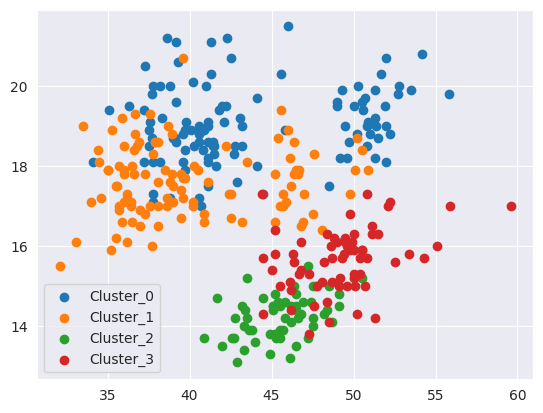

In [ ]:
for i in df_final["cluster"].unique():
  if i != -1:
    # Plot except outliers
    plt.scatter(X[y == i, 0], X[y ==i, 1], label="Cluster_" + str(i))
plt.legend()

## Analyzing Characteristics of the identified clusters

#### Plot Categorical Features with each Cluster

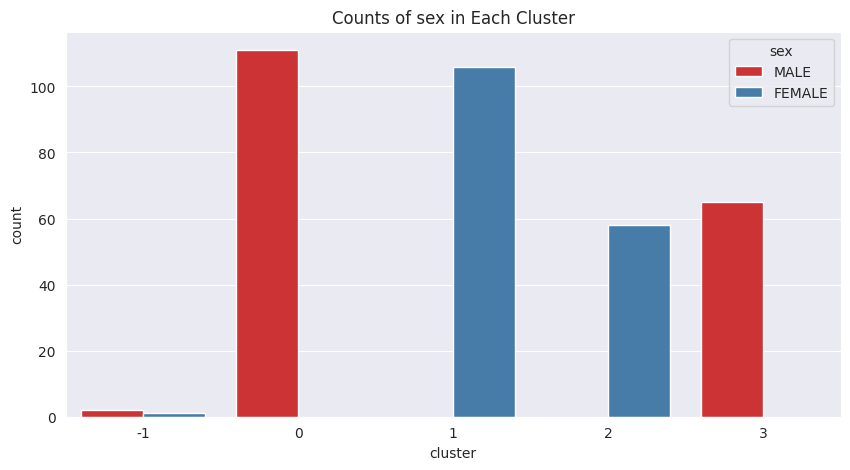

In [ ]:
for col in cat_columns:
  plt.figure(figsize=(10, 5))
  sns.countplot(data=df_final,
                x="cluster",
                hue=col,
                order=sorted(df_final["cluster"].unique()),
                palette="Set1")
  plt.title(f"Counts of {col} in Each Cluster")

#### Distribution of  Numerical Features with each cluster

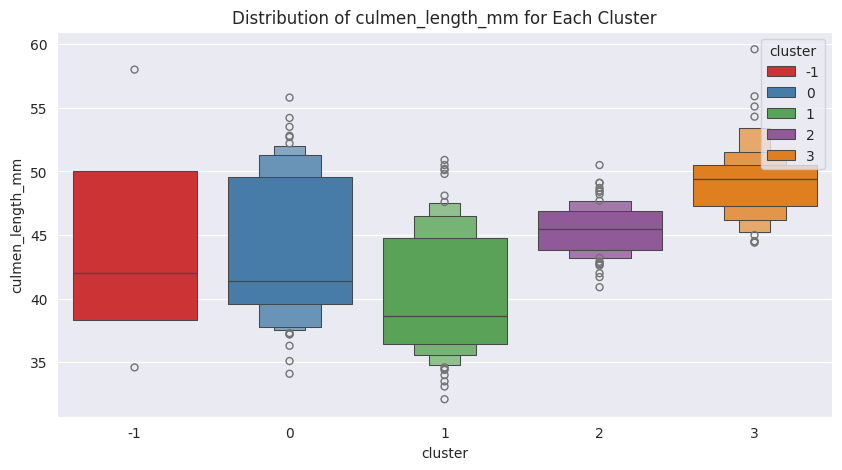

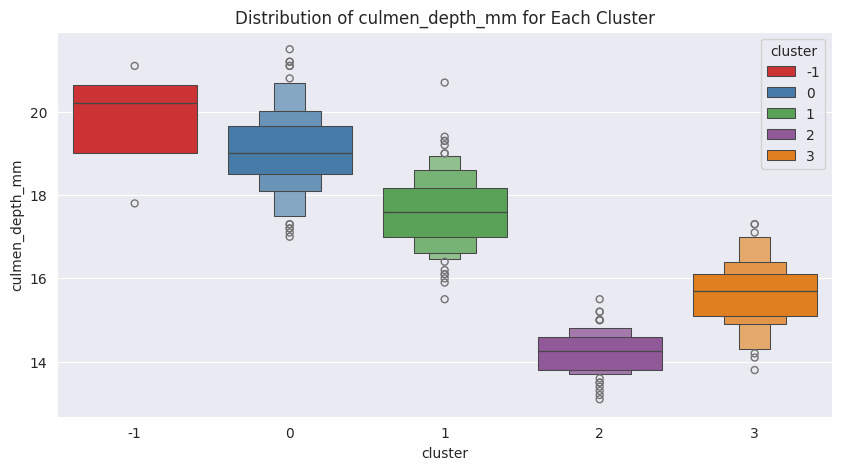

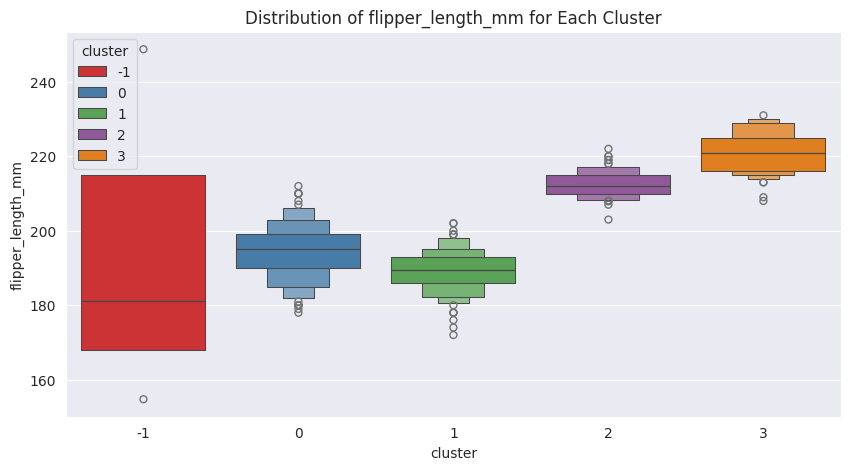

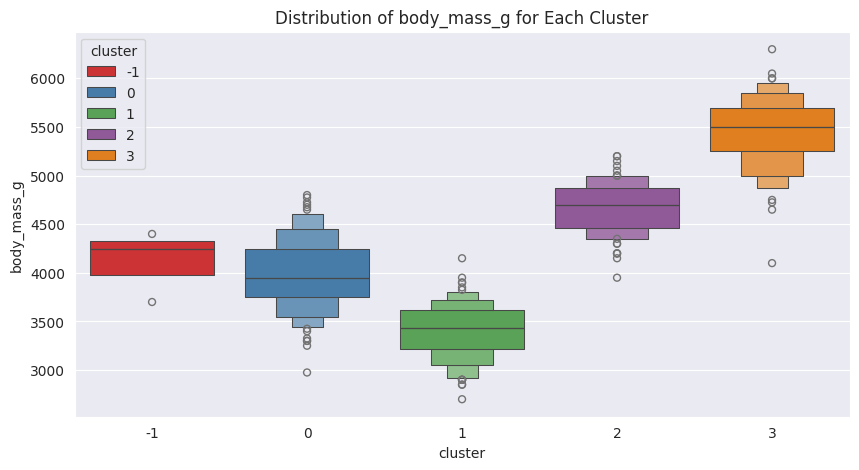

In [ ]:
for col in num_columns:
  plt.figure(figsize=(10, 5))
  sns.boxenplot(data= df_final,
                x="cluster",
                y=col,
                hue="cluster",
                order=sorted(df_final["cluster"].unique()),
                palette="Set1")
  plt.title(f"Distribution of {col} for Each Cluster")

## Conclutions

* Analyzing the scatter plot for each cluster we can say that some data points of 0 & 1 and 2 & 3 are overlapped.

* Analyzing the numerical features for each cluster we can find that:
  * BALANCE_FREQUENCY has no impact on clustering as in all clusters most of the customers updated the balance frequently.
  * MINIMUM_PAYMENTS has no impact on clustering as in all clusters minimum payments are same for customers.

**Cluster 0**
* MALE Penguins
* Culmen length 40mm to 50mm
* Culmen depth 18mm to 20mm
* Low Flipper length
* Low Body Mass

**In Short** *Male penguins with low flipper length and low body mass.*

**Cluster 1**
* FEMALE Penguins
* Culmen length 35mm to 45mm
* Culmen depth 15m to 18mm
* Lowest Flipper length
* Lowest Flipper length

**In Short** *Female penguins with lowest flipper length and lowest body mass.*


**Cluster 2**
* FEMALE Penguins
* Culmen length 42mm to 50mm
* Culmen depth 13mm to 15mm
* High Flipper length
* High Flipper length

**In Short** *Female penguins with high flipper length and high body mass.*


**Cluster 3**
* MALE Penguins
* Culmen length 45mm to 51mm
* Culmen depth 15mm to 18mm
* Highest Flipper length
* Highest Flipper length

**In Short** *Male penguins with highest flipper length and highest body mass.*

